# Exploratory Data Notebook - Gil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# food inspection database
data_FI = pd.read_csv('datasets/Food_Inspections.csv')

In [4]:
data_FI.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1967170,"GOOSE ISLAND BAR - T1, B4",GOOSE ISLAND (T1-B4),2477070.0,Restaurant,Risk 2 (Medium),11601 W TOUHY AVE,CHICAGO,IL,60666.0,10/25/2016,License,Pass,NaN,42.008536,-87.914428,"(42.008536400868735, -87.91442843927047)"
1,1967164,ERMEL'S,ERMEL'S,2484238.0,Restaurant,Risk 1 (High),5729 N NORTHWEST HWY,CHICAGO,IL,60646.0,10/25/2016,License,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.986001,-87.787528,"(41.98600113711187, -87.78752792018707)"
2,1967146,"WENDY'S PROPERTIES, LLC",WENDY'S,2469194.0,Restaurant,Risk 1 (High),6324 N WESTERN AVE,CHICAGO,IL,60659.0,10/25/2016,License,Pass,NaN,41.996677,-87.689996,"(41.99667685737697, -87.68999575516291)"
3,1967133,LEARN TOGETHER GROW TOGETHER CHILD DEVELOPMENT...,LEARN TOGETHER GROW TOGETHER CHILD DEVELOPMENT C,2384887.0,Daycare Above and Under 2 Years,Risk 1 (High),1126 W 99TH ST,CHICAGO,IL,60643.0,10/25/2016,License,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.714241,-87.651464,"(41.714240500986136, -87.6514643961654)"
4,1967115,Porkchop,Porkchop,2373923.0,Restaurant,Risk 1 (High),29 E ADAMS ST,CHICAGO,IL,60603.0,10/24/2016,Short Form Complaint,Pass,NaN,41.879397,-87.626631,"(41.87939700209408, -87.62663087278814)"


### Number of Different Complaints

In [5]:
data_FI.Violations.unique()

array([nan,
       '32. FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED - Comments: MUST NOT USE TINFOIL AS LINER FOR SHELVING THROUGHOUT. MUST NOT USE CARDBOARD BOXES AS CONTAINERS FOR FOOD ITEMS. MUST BE SMOOTH AND CLEANABLE. \nMUST NOT USE RAW WOOD AS LIFTS FOR EQUIPMENT. | 38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQUIRED: PLUMBING: INSTALLED AND MAINTAINED - Comments: MUST INSTALL A SPLASH GUARD BETWEEN THE REAR EXPOSED HAND SINK AND THE THREE COMPARTMENT SINK. | 43. FOOD (ICE) DISPENSING UTENSILS, WASH CLOTHS PROPERLY STORED - Comments: ALL COOKS LINE WIPING CLOTHS MUST BE STORED IN A CLEAN CONTAINER WITH A SANITIZING SOLUTION. | 33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS - Comments: DIRTY WALL MOUNTED FRY SLICER MUST BE CLEANED AFTER EACH USE. | 35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS - Comments: WATER DAMAGED CEILING TI

Two problems:

* Multiple Violations counted as different
* comments Section counts as different

Solution: Lists of individual violations for each establishment with comments removed

In [6]:
import re

# cleaned data. will be inputted into DF after cleaning
viol_list_of_lists = []

for i, viol in enumerate(data_FI.Violations):
    # for each establishment
    viols = []
    
    # if nan, no complaints
    if pd.isnull(viol):
        viol_list_of_lists.append(viols)
    else:
        # split into separate complaints
        viols = viol.split(' | ')
        for j, complaint in enumerate(viols):
            complaint = complaint.split(' - Comments: ')[0]
            viols[j] = complaint
        viol_list_of_lists.append(viols)

In [7]:
violations_df = pd.Series([item for sublist in viol_list_of_lists for item in sublist])

In [8]:
len(violations_df.unique())

46

In [9]:
violations_df.unique()

array([ '32. FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED',
       '38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQUIRED: PLUMBING: INSTALLED AND MAINTAINED',
       '43. FOOD (ICE) DISPENSING UTENSILS, WASH CLOTHS PROPERLY STORED',
       '33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS',
       '35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS',
       '41. PREMISES MAINTAINED FREE OF LITTER, UNNECESSARY ARTICLES, CLEANING  EQUIPMENT PROPERLY STORED',
       '34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED',
       '18. NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS',
       '24. DISH WASHING FACILITIES: PROPERLY DESIGNED, CONSTRUCTED, MAINTAINED, INSTALLED, LOCATED AND OPERATED',
       '37. TOI

Would be great to hash by number but have a reference dictionary to recover the actual violation.

In [10]:
violation_code_dict = {}
for viol in violations_df:
    code = viol.split('. ')[0]
    viol_ = viol.split('. ')[1]
    violation_code_dict[code] = viol_

In [11]:
violation_code_dict

{'1': 'SOURCE SOUND CONDITION, NO SPOILAGE, FOODS PROPERLY LABELED, SHELLFISH TAGS IN PLACE',
 '10': 'SEWAGE AND WASTE WATER DISPOSAL, NO BACK SIPHONAGE, CROSS  CONNECTION AND/OR BACK FLOW',
 '11': 'ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, DESIGNED, AND MAINTAINED',
 '12': 'HAND WASHING FACILITIES: WITH SOAP AND SANITARY HAND DRYING DEVICES, CONVENIENT AND ACCESSIBLE TO FOOD PREP AREA',
 '13': 'NO EVIDENCE OF RODENT OR INSECT INFESTATION, NO BIRDS, TURTLES OR OTHER ANIMALS',
 '14': 'PREVIOUS SERIOUS VIOLATION CORRECTED, 7-42-090',
 '15': 'UNWRAPPED AND POTENTIALLY HAZARDOUS FOOD NOT RE-SERVED',
 '16': 'FOOD PROTECTED DURING STORAGE, PREPARATION, DISPLAY, SERVICE AND TRANSPORTATION',
 '17': 'POTENTIALLY HAZARDOUS FOOD PROPERLY THAWED',
 '18': 'NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS',
 '19': 'OUTSIDE GARBAGE WASTE GREASE AND STORAGE AREA; CLEAN, RODENT PROOF, ALL CONTAINERS COVERED',
 '2': 'FA

In [12]:
# number of violations per establisment
no_viols = [len(x) for x in viol_list_of_lists]

In [13]:
no_viols_df = pd.Series(data=no_viols, index=data_FI['Inspection ID'], name='Number of Violations')

0.00     0.0
0.25     1.0
0.50     3.0
0.75     6.0
1.00    23.0
Name: Number of Violations, dtype: float64


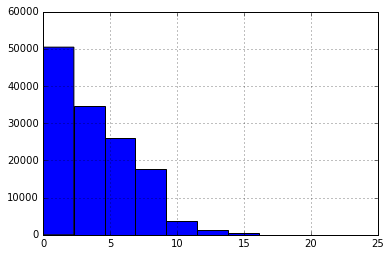

In [14]:
no_viols_df.hist()
print no_viols_df.quantile([0, 0.25, 0.5, 0.75, 1.])

In [15]:
no_viols_df.idxmax()

1115232

In [16]:
data_FI[data_FI['Inspection ID'] == no_viols_df.idxmax()]

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
53468,1115232,RACINE BAKERY INC,RACINE BAKERY INC,15456.0,Bakery,Risk 1 (High),6216 S ARCHER AVE,CHICAGO,IL,60638.0,03/27/2014,Complaint,Pass w/ Conditions,"41. PREMISES MAINTAINED FREE OF LITTER, UNNECE...",41.793838,-87.775305,"(41.79383817679765, -87.77530511023124)"


### Risk Level Hashing

In [17]:
def risk_hash(x):
    if x == 'All':
        # catchall
        return -1
    elif pd.isnull(x):
        return 0
    else:
        return int(x.split(' ')[1])

riskhash = data_FI['Risk'].apply(lambda x: risk_hash(x))
riskhash.index = data_FI['Inspection ID']

In [18]:
riskhash.unique()

array([ 2,  1,  3, -1,  0], dtype=int64)

In [19]:
riskhash_dict = {
    1 : 'High',
    2 : 'Medium',
    3 : 'Low',
    0 : 'None',
    -1 : 'All',
}

In [20]:
riskhash

Inspection ID
1967170    2
1967164    1
1967146    1
1967133    1
1967115    1
1967120    1
1967112    2
1967103    1
1951286    1
1966968    1
1967089    1
1967085    1
1967075    1
1967062    1
1967051    2
1967057    2
1966757    2
1967040    1
1967036    3
1967043    2
1967032    1
1967029    1
1966991    1
1967022    1
1967000    2
1966997    2
1967002    3
1966993    1
1955305    1
1966959    1
          ..
74257      3
70272      1
67746      3
68251      3
67743      1
98314      1
114255     1
160208     1
70271      1
67744      1
158242     2
160207     1
67741      3
68250      1
74256      1
67739      1
120270     1
96246      1
67736      2
160206     1
164252     2
114254     1
118296     1
98313      3
67733      1
67732      1
67757      2
52234      1
70269      1
104236     1
Name: Risk, dtype: int64

In [21]:
risk_viol_df = pd.DataFrame([riskhash, no_viols_df]).transpose()

In [22]:
risk_viol_df.head()

,Risk,Number of Violations
Inspection ID,,
1967170,2,0
1967164,1,6
1967146,1,0
1967133,1,3
1967115,1,0


In [23]:
risk_viol_df.groupby('Risk').mean()

,Number of Violations
Risk,
-1,0.000000
0,0.048387
1,3.993918
2,3.516881
3,2.316363


Risk level appears to be weakly predictive.

#### High Risk Histogram

Risk
-1    [[Axes(0.125,0.125;0.775x0.775)]]
 0    [[Axes(0.125,0.125;0.775x0.775)]]
 1    [[Axes(0.125,0.125;0.775x0.775)]]
 2    [[Axes(0.125,0.125;0.775x0.775)]]
 3    [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

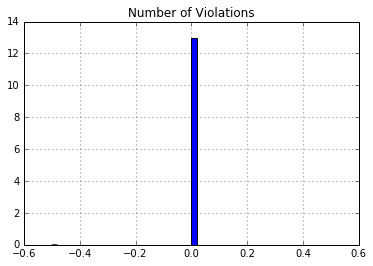

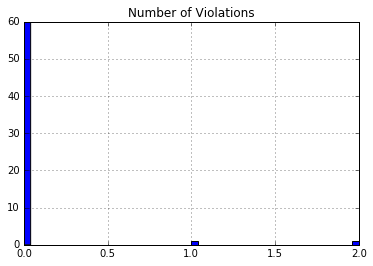

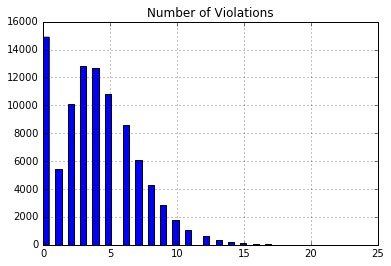

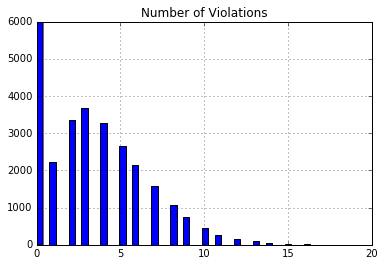

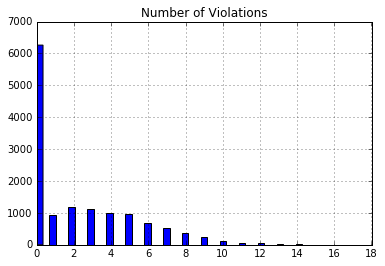

In [24]:
risk_viol_df.groupby('Risk').hist(bins=50)

Might need a mixed model: ZIP?

lets have a look at High risk for ZIP:

NB: $\hat{\lambda}_{MLE} = \bar{X}$

In [25]:
high_risk = risk_viol_df.groupby('Risk').get_group(1)

from __future__ import division

# bernoulli part:
p = len(high_risk[high_risk['Number of Violations'] == 0]) / len(high_risk)
q = 1 - p

In [26]:
len(high_risk)

92731

In [27]:
# now fit a poisson
non_zero_high_risk = high_risk[high_risk['Number of Violations'] != 0]
lambda_hat = non_zero_high_risk['Number of Violations'].mean()

In [28]:
# randomly generated distribution
vals = np.empty(92731,)

for i in np.arange(len(vals)):
    if np.random.binomial(1, q, size=1)[0] == 1:
        vals[i] = np.random.poisson(lambda_hat, size=1)
    else:
        vals[i] = 0

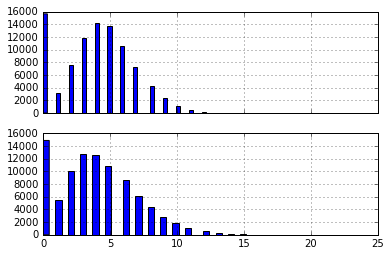

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
pd.Series(vals).hist(bins=50, ax=ax1)
high_risk['Number of Violations'].hist(bins=50, ax=ax2);


Issue with skew :(

### Checking Results

In [30]:
data_FI['Results'].unique()

array(['Pass', 'No Entry', 'Pass w/ Conditions', 'Fail', 'Out of Business',
       'Not Ready', 'Business Not Located'], dtype=object)

In [31]:
data_FI.groupby('Results')